# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Load the dataset and inspect it
df = pd.read_csv('imdb.csv', sep='\t')

df.head()

list(df.columns.values).index('Gross_Revenue')


X

,aamir,aamir khan,abraham,adam,adrien,adrien brody,affleck,al,al pacino,alan,...,APPROVED,G,M,N/A,NOT RATED,PASSED,PG,PG-13,R,UNRATED
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# Assign the rating to a y vector and the binary columns to an X feature matrix
X = df.iloc[:,22:]
y = df.imdbRating

# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

In [25]:
def evaluate(X_test,y_test):
    # Use r2_score to judge the goodness of the regression
    print 'R2 Score: ', model.score(X_test,y_test)

    # Determine what features are most important
    df_important_features = pd.DataFrame({'Feature': X_test.columns.values, 'Importance %': model.feature_importances_})

    # Display the predicted and actual values in a plot
    plt.scatter(predictions, y_test)
    plt.show()

    return df_important_features.sort_values('Importance %',ascending = False).head(30)

R2 Score:  -0.614530617409


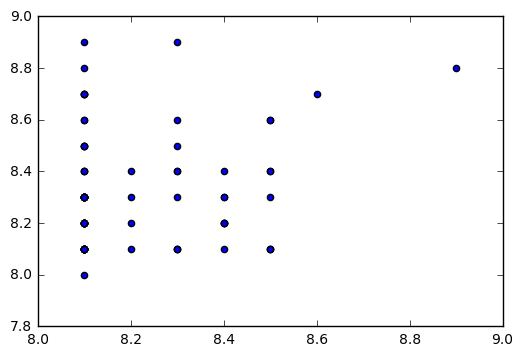

,Feature,Importance %
938,william sadler,0.099151
7,al,0.062343
222,james,0.052967
323,ledger,0.050844
799,sean astin,0.050835
495,marshall,0.038380
882,wallach,0.037891
118,diane,0.031131
137,ellen,0.030613
65,carrie,0.030468


In [20]:
# Create a Decision Tree Regression MODEL
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# Import and initialize the DecisionTreeRegressor class from scikit-learn
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

# Fit it to the training set
model.fit(X_train, y_train)

# Predict the values of the test set
predictions = model.predict(X_test)

# Evaluate Model
evaluate(X_test,y_test)

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

R2 Score:  -0.312541926732


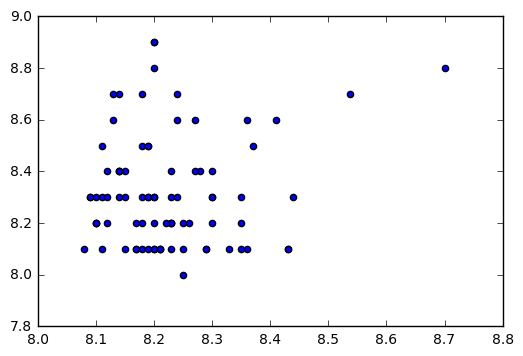

,Feature,Importance %
938,william sadler,0.095988
7,al,0.062076
65,carrie,0.035931
25,astin,0.033541
324,ledger aaron,0.025967
495,marshall,0.024962
47,bob,0.020210
222,james,0.019440
1051,drama war,0.019389
492,marlon,0.017964


In [26]:
# Create Random Forest Model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict the values of the test set
predictions = model.predict(X_test)

# Evaluate Random Forest Model
evaluate(X_test,y_test)

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

[-0.33792098 -0.31429469 -0.17408515]


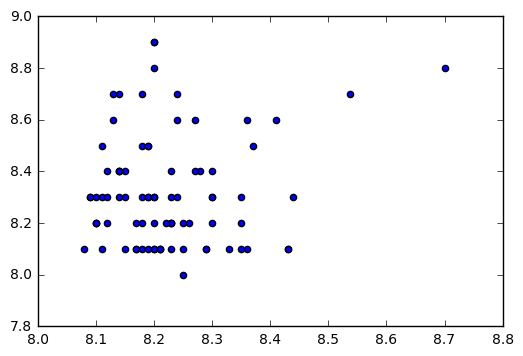

0.0133199848149
The score is higher still.


In [27]:
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train)
print scores
y_pred = abr.predict(X_test)
plt.scatter(predictions, y_test)
plt.show()
print abr.score(X_test, y_test)
print 'The score is higher still.'

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

R2 Score:  -0.0439520267083


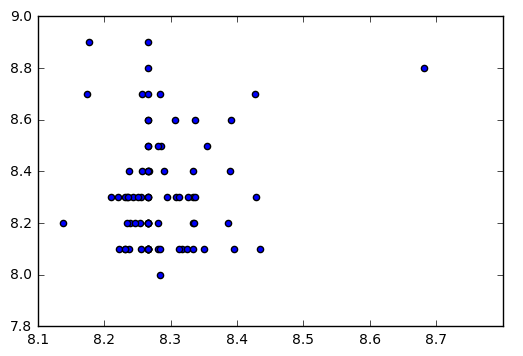

,Feature,Importance %
938,william sadler,0.034326
7,al,0.031250
799,sean astin,0.029667
495,marshall,0.028635
137,ellen,0.027285
222,james,0.027147
883,wallach clint,0.026180
158,freeman,0.025075
778,robert duvall,0.018350
1051,drama war,0.018051


In [30]:
# Create Gradient Boost Regressor

# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = GradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)

# Predict the values of the test set
predictions = model.predict(X_test)

# Evaluate Random Forest Model
evaluate(X_test,y_test)

## 5. Tableau Practice

Put your data into Tableau. Once it is there, make a new url on your website and upload your new Tableau document to your site. Post your website's URL below.

In [29]:
print "https://mattbrown3255.herokuapp.com/site/IMDB_Dashboard/"

https://mattbrown3255.herokuapp.com/site/IMDB_Dashboard/


## Bonus

Take the best model and try to improve it using grid search.